In [1]:
!pip install tweepy
!pip install openpyxl
!pip install transformers
!pip install textblob
import numpy as np
import pandas as pd
import tweepy
import json
from textblob import TextBlob
import re
from tweepy import OAuthHandler
from transformers import TFDistilBertForSequenceClassification, DistilBertTokenizer
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt



In [2]:
#consumer_key = '<---Consumer Key HERE---->'
#consumer_secret = '<---Consumer Secret Key HERE---->'
#access_token = '<---Access Token HERE---->'
#access_token_secret = '<---Access Token Seceret Key HERE---->'

In [3]:
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)

In [4]:
df = pd.DataFrame(columns = ['Tweets' , 'User' , 'User_statuses_count' , 
                            'user_followers' , 'User_location' , 'User_verified' ,
                            'like_count' , 'retweet_count' , 'tweet_date'] )
print(df)

Empty DataFrame
Columns: [Tweets, User, User_statuses_count, user_followers, User_location, User_verified, like_count, retweet_count, tweet_date]
Index: []


In [5]:
def stream(data,file_name):
    i=0
    for tweet in tweepy.Cursor(api.search,q=data,count=100,lan='en').items():
        print(i, end='\r')
        df.loc[i, 'Tweets'] = tweet.text
        df.loc[i, 'User'] = tweet.user.name
        df.loc[i, 'User_statuses_count'] = tweet.user.statuses_count
        df.loc[i, 'user_followers'] = tweet.user.followers_count
        df.loc[i, 'User_location'] = tweet.user.location
        df.loc[i, 'User_verified'] = tweet.user.verified
        df.loc[i, 'like_count'] = tweet.favorite_count
        df.loc[i, 'retweet_count'] = tweet.retweet_count
        df.loc[i, 'tweet_date'] = tweet.created_at
        df.to_csv(file_name)
        i = i+1
        if i == 1000:
            break
        else:
            pass

In [6]:
stream(data=["Christmas"] , file_name='my_tweets.csv')

In [7]:
df.head()

,Tweets,User,User_statuses_count,user_followers,User_location,User_verified,like_count,retweet_count,tweet_date
0,Christmas film na gang ngayun d ko pinagsasawa...,CARLOKANTUTERO,324,57216,"Rizal, Calabarzon",False,0,0,2021-12-01 02:15:05
1,RT @JoeBiden: There’s still time to get your f...,Elaine Perliss,2046,94,"Sherman Oaks, Tarzana, CA",False,0,2449,2021-12-01 02:15:05
2,RT @OnnyReview: โอ้โหหห Christmas กลางเมืองที่...,𝒻,51902,89,,False,0,23269,2021-12-01 02:15:05
3,"2021 Christmas tree lightings, parades around ...",ABC 36 News,78638,28710,"Lexington, KY",True,0,0,2021-12-01 02:15:05
4,RT @sudsapda: Stray Kids ส่งคลิปทักทาย มาพร้อม...,ℓαzу єƒ 🐈‍⬛,224510,451,,False,0,215,2021-12-01 02:15:05


In [8]:
def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ', tweet).split())

In [9]:
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        #print("P",analysis.sentiment.polarity)
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        #print("Neutral",analysis.sentiment.polarity)
        return 'Neutral'
    else:
        #print('Neg',analysis.sentiment.polarity)
        return 'Negative'

In [10]:
df['clean_tweet'] = df['Tweets'].apply(lambda x : clean_tweet(x))

In [11]:
df.head()

,Tweets,User,User_statuses_count,user_followers,User_location,User_verified,like_count,retweet_count,tweet_date,clean_tweet
0,Christmas film na gang ngayun d ko pinagsasawa...,CARLOKANTUTERO,324,57216,"Rizal, Calabarzon",False,0,0,2021-12-01 02:15:05,Christmas film na gang ngayun d ko pinagsasawa...
1,RT @JoeBiden: There’s still time to get your f...,Elaine Perliss,2046,94,"Sherman Oaks, Tarzana, CA",False,0,2449,2021-12-01 02:15:05,RT There s still time to get your first shot y...
2,RT @OnnyReview: โอ้โหหห Christmas กลางเมืองที่...,𝒻,51902,89,,False,0,23269,2021-12-01 02:15:05,RT Christmas
3,"2021 Christmas tree lightings, parades around ...",ABC 36 News,78638,28710,"Lexington, KY",True,0,0,2021-12-01 02:15:05,2021 Christmas tree lightings parades around C...
4,RT @sudsapda: Stray Kids ส่งคลิปทักทาย มาพร้อม...,ℓαzу єƒ 🐈‍⬛,224510,451,,False,0,215,2021-12-01 02:15:05,RT Stray Kids Christmas EveL


In [12]:
df['Sentiment'] = df['clean_tweet'].apply(lambda x : analyze_sentiment(x) )
df.head()

,Tweets,User,User_statuses_count,user_followers,User_location,User_verified,like_count,retweet_count,tweet_date,clean_tweet,Sentiment
0,Christmas film na gang ngayun d ko pinagsasawa...,CARLOKANTUTERO,324,57216,"Rizal, Calabarzon",False,0,0,2021-12-01 02:15:05,Christmas film na gang ngayun d ko pinagsasawa...,Neutral
1,RT @JoeBiden: There’s still time to get your f...,Elaine Perliss,2046,94,"Sherman Oaks, Tarzana, CA",False,0,2449,2021-12-01 02:15:05,RT There s still time to get your first shot y...,Positive
2,RT @OnnyReview: โอ้โหหห Christmas กลางเมืองที่...,𝒻,51902,89,,False,0,23269,2021-12-01 02:15:05,RT Christmas,Neutral
3,"2021 Christmas tree lightings, parades around ...",ABC 36 News,78638,28710,"Lexington, KY",True,0,0,2021-12-01 02:15:05,2021 Christmas tree lightings parades around C...,Neutral
4,RT @sudsapda: Stray Kids ส่งคลิปทักทาย มาพร้อม...,ℓαzу єƒ 🐈‍⬛,224510,451,,False,0,215,2021-12-01 02:15:05,RT Stray Kids Christmas EveL,Neutral


In [13]:
df.head()

,Tweets,User,User_statuses_count,user_followers,User_location,User_verified,like_count,retweet_count,tweet_date,clean_tweet,Sentiment
0,Christmas film na gang ngayun d ko pinagsasawa...,CARLOKANTUTERO,324,57216,"Rizal, Calabarzon",False,0,0,2021-12-01 02:15:05,Christmas film na gang ngayun d ko pinagsasawa...,Neutral
1,RT @JoeBiden: There’s still time to get your f...,Elaine Perliss,2046,94,"Sherman Oaks, Tarzana, CA",False,0,2449,2021-12-01 02:15:05,RT There s still time to get your first shot y...,Positive
2,RT @OnnyReview: โอ้โหหห Christmas กลางเมืองที่...,𝒻,51902,89,,False,0,23269,2021-12-01 02:15:05,RT Christmas,Neutral
3,"2021 Christmas tree lightings, parades around ...",ABC 36 News,78638,28710,"Lexington, KY",True,0,0,2021-12-01 02:15:05,2021 Christmas tree lightings parades around C...,Neutral
4,RT @sudsapda: Stray Kids ส่งคลิปทักทาย มาพร้อม...,ℓαzу єƒ 🐈‍⬛,224510,451,,False,0,215,2021-12-01 02:15:05,RT Stray Kids Christmas EveL,Neutral


In [14]:
df = df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
df.head()

,Tweets,User,User_statuses_count,user_followers,User_location,User_verified,like_count,retweet_count,tweet_date,clean_tweet,Sentiment
0,Christmas film na gang ngayun d ko pinagsasawa...,CARLOKANTUTERO,324,57216,"Rizal, Calabarzon",False,0,0,2021-12-01 02:15:05,Christmas film na gang ngayun d ko pinagsasawa...,Neutral
1,RT @JoeBiden: Theres still time to get your fi...,Elaine Perliss,2046,94,"Sherman Oaks, Tarzana, CA",False,0,2449,2021-12-01 02:15:05,RT There s still time to get your first shot y...,Positive
2,RT @OnnyReview: Christmas https://t.co/TMxd...,,51902,89,,False,0,23269,2021-12-01 02:15:05,RT Christmas,Neutral
3,"2021 Christmas tree lightings, parades around ...",ABC 36 News,78638,28710,"Lexington, KY",True,0,0,2021-12-01 02:15:05,2021 Christmas tree lightings parades around C...,Neutral
4,RT @sudsapda: Stray Kids Christmas EveL,z,224510,451,,False,0,215,2021-12-01 02:15:05,RT Stray Kids Christmas EveL,Neutral


In [15]:
le = LabelEncoder()
df['Sentiment'] = le.fit_transform(df['Sentiment'])

In [16]:
df.head()

,Tweets,User,User_statuses_count,user_followers,User_location,User_verified,like_count,retweet_count,tweet_date,clean_tweet,Sentiment
0,Christmas film na gang ngayun d ko pinagsasawa...,CARLOKANTUTERO,324,57216,"Rizal, Calabarzon",False,0,0,2021-12-01 02:15:05,Christmas film na gang ngayun d ko pinagsasawa...,1
1,RT @JoeBiden: Theres still time to get your fi...,Elaine Perliss,2046,94,"Sherman Oaks, Tarzana, CA",False,0,2449,2021-12-01 02:15:05,RT There s still time to get your first shot y...,2
2,RT @OnnyReview: Christmas https://t.co/TMxd...,,51902,89,,False,0,23269,2021-12-01 02:15:05,RT Christmas,1
3,"2021 Christmas tree lightings, parades around ...",ABC 36 News,78638,28710,"Lexington, KY",True,0,0,2021-12-01 02:15:05,2021 Christmas tree lightings parades around C...,1
4,RT @sudsapda: Stray Kids Christmas EveL,z,224510,451,,False,0,215,2021-12-01 02:15:05,RT Stray Kids Christmas EveL,1


In [17]:
X_train, X_test, y_train, y_test = train_test_split(df['Tweets'].values,df['Sentiment'].values,test_size=0.3)

In [18]:
base = 'distilbert-base-uncased'

In [19]:
tokenizer = DistilBertTokenizer.from_pretrained(base)
model = TFDistilBertForSequenceClassification.from_pretrained(base)
optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer,loss='mse', metrics=['accuracy'])

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['activation_13', 'vocab_projector', 'vocab_layer_norm', 'vocab_transform']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'classifier', 'dropout_19']
You should probably TRAIN this model on a down-stream task to be able to use i

In [20]:
def batch_encode(X, tokenizer):
  return tokenizer.batch_encode_plus(
      X,
      max_length = 64,
      add_special_tokens = True,
      return_attention_mask = True,
      pad_to_max_length = True,
      return_tensors = 'tf',
  )

In [21]:
X_train = batch_encode(X_train,tokenizer)
X_test = batch_encode(X_test,tokenizer)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2218: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [22]:
X_train

{'input_ids': <tf.Tensor: shape=(700, 64), dtype=int32, numpy=
array([[  101,  1045,  5621, ...,     0,     0,     0],
       [  101, 19387,  1030, ...,     0,     0,     0],
       [  101, 19387,  1030, ...,     0,     0,     0],
       ...,
       [  101, 19387,  1030, ...,     0,     0,     0],
       [  101,  2138,  1045, ...,     0,     0,     0],
       [  101, 19387,  1030, ...,     0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(700, 64), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}

In [23]:
y_train = y_train.reshape(y_train.shape[0], -1)
y_train = y_train.astype(int)
y_train = np.c_[y_train, 1 - y_train]
y_test = y_test.reshape(y_test.shape[0], -1)
y_test = y_test.astype(int)
y_test = np.c_[y_test, 1 - y_test]

In [24]:
history = model.fit(
	x=X_train.values(),
	y=y_train,
	validation_data=(X_test.values(), y_test),
	epochs=20,
	batch_size=32
)

Epoch 1/20
22/22 [==============================] - 26s 552ms/step - loss: 2.3889 - accuracy: 0.6714 - val_loss: 0.4173 - val_accuracy: 0.8133
Epoch 2/20
22/22 [==============================] - 10s 448ms/step - loss: 0.5016 - accuracy: 0.8214 - val_loss: 0.3856 - val_accuracy: 0.8133
Epoch 3/20
22/22 [==============================] - 10s 445ms/step - loss: 0.5021 - accuracy: 0.8214 - val_loss: 0.3870 - val_accuracy: 0.8133
Epoch 4/20
22/22 [==============================] - 10s 449ms/step - loss: 0.5054 - accuracy: 0.8214 - val_loss: 0.3810 - val_accuracy: 0.8133
Epoch 5/20
22/22 [==============================] - 10s 448ms/step - loss: 0.4974 - accuracy: 0.8214 - val_loss: 0.3765 - val_accuracy: 0.8133
Epoch 6/20
22/22 [==============================] - 10s 448ms/step - loss: 0.5120 - accuracy: 0.8214 - val_loss: 0.4624 - val_accuracy: 0.8133
Epoch 7/20
22/22 [==============================] - 10s 449ms/step - loss: 0.4945 - accuracy: 0.8214 - val_loss: 0.3935 - val_accuracy: 0.8133

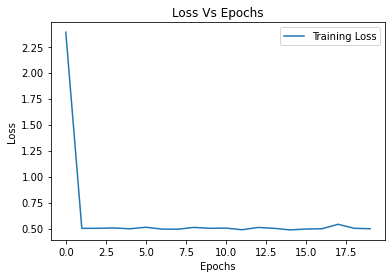

In [28]:
loss_train = history.history['loss']

epochs = range(20)
plt.plot(epochs, loss_train, label='Training Loss')
plt.title('Loss Vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

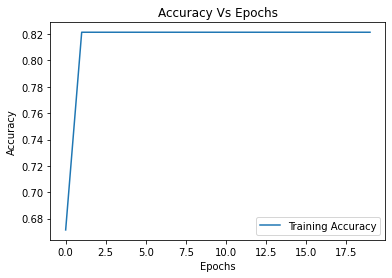

In [29]:
acc_train = history.history['accuracy']

epochs = range(20)
plt.plot(epochs, acc_train, label='Training Accuracy')
plt.title('Accuracy Vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()